# Taller Crimes Boston

### **Anderson Alvarado**

# Librerias

In [ ]:
%pip install pandas matplotlib seaborn numpy nbformat scikit-learn openpyxl

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

In [39]:
%run "0_Funciones/0_funciones.ipynb"

# Cargar Datos

In [14]:
# carga el dataset Data/crime.csv
df_ventas = pd.read_excel("Data/Datos_Taller.xlsx", sheet_name="Train")
df_ventas.head()

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
0,1648,11,10042,68,35,22609.49,30,66307,8,Grande,2,43747.692274
1,1259,3,11909,107,42,24561.99,35,29107,8,Grande,2,37483.689991
2,674,13,10669,75,33,38914.22,52,9519,4,Median,3,57522.995483
3,1558,7,6981,65,19,39204.97,30,28651,7,Grande,1,50338.062084
4,1626,22,10940,74,37,23947.08,46,30654,7,Grande,2,45675.550054


# Descripción Dataset

In [15]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idloc      1600 non-null   int64  
 1   edadloc    1600 non-null   int64  
 2   correo     1600 non-null   int64  
 3   paginas    1600 non-null   int64  
 4   telefono   1600 non-null   int64  
 5   impresa    1600 non-null   float64
 6   servicio   1600 non-null   int64  
 7   nomina     1600 non-null   int64  
 8   idmercado  1600 non-null   int64  
 9   tamamer    1600 non-null   object 
 10  promo      1600 non-null   int64  
 11  ropamujer  1600 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 150.1+ KB


In [16]:
analizar_dataframe(df_ventas)

Número de filas y columnas: (1600, 12)

Número de nulos por columnas: 
idloc        0
edadloc      0
correo       0
paginas      0
telefono     0
impresa      0
servicio     0
nomina       0
idmercado    0
tamamer      0
promo        0
ropamujer    0
dtype: int64

Número total de nulos: 0 

% de nulos de cada columna: 
idloc        0.0
edadloc      0.0
correo       0.0
paginas      0.0
telefono     0.0
impresa      0.0
servicio     0.0
nomina       0.0
idmercado    0.0
tamamer      0.0
promo        0.0
ropamujer    0.0
dtype: float64 

Porcentaje de duplicados: 0.00%


# Análisis del Dataset

In [17]:
# descripción de los datos
df_ventas.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
idloc,1600.0,NaN,NaN,NaN,995.531875,577.53636,1.0,495.75,996.0,1495.25,1998.0
edadloc,1600.0,NaN,NaN,NaN,10.469375,7.385588,1.0,4.0,9.0,17.0,25.0
correo,1600.0,NaN,NaN,NaN,10598.675625,2400.668832,1147.0,9644.25,10480.0,11763.5,15259.0
paginas,1600.0,NaN,NaN,NaN,85.0425,15.935398,51.0,74.0,84.0,98.0,114.0
telefono,1600.0,NaN,NaN,NaN,37.6375,9.745792,17.0,30.0,36.0,43.0,59.0
impresa,1600.0,NaN,NaN,NaN,28834.617337,6251.170239,18061.2,23562.3175,28734.79,34022.9925,40027.78
servicio,1600.0,NaN,NaN,NaN,43.65125,13.241524,15.0,33.0,43.0,54.0,68.0
nomina,1600.0,NaN,NaN,NaN,24104.13125,18217.352027,901.0,10680.5,18886.5,31637.25,135882.0
idmercado,1600.0,NaN,NaN,NaN,4.925,2.606458,1.0,3.0,5.0,7.0,9.0
tamamer,1600,3,Median,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Distribución de los datos

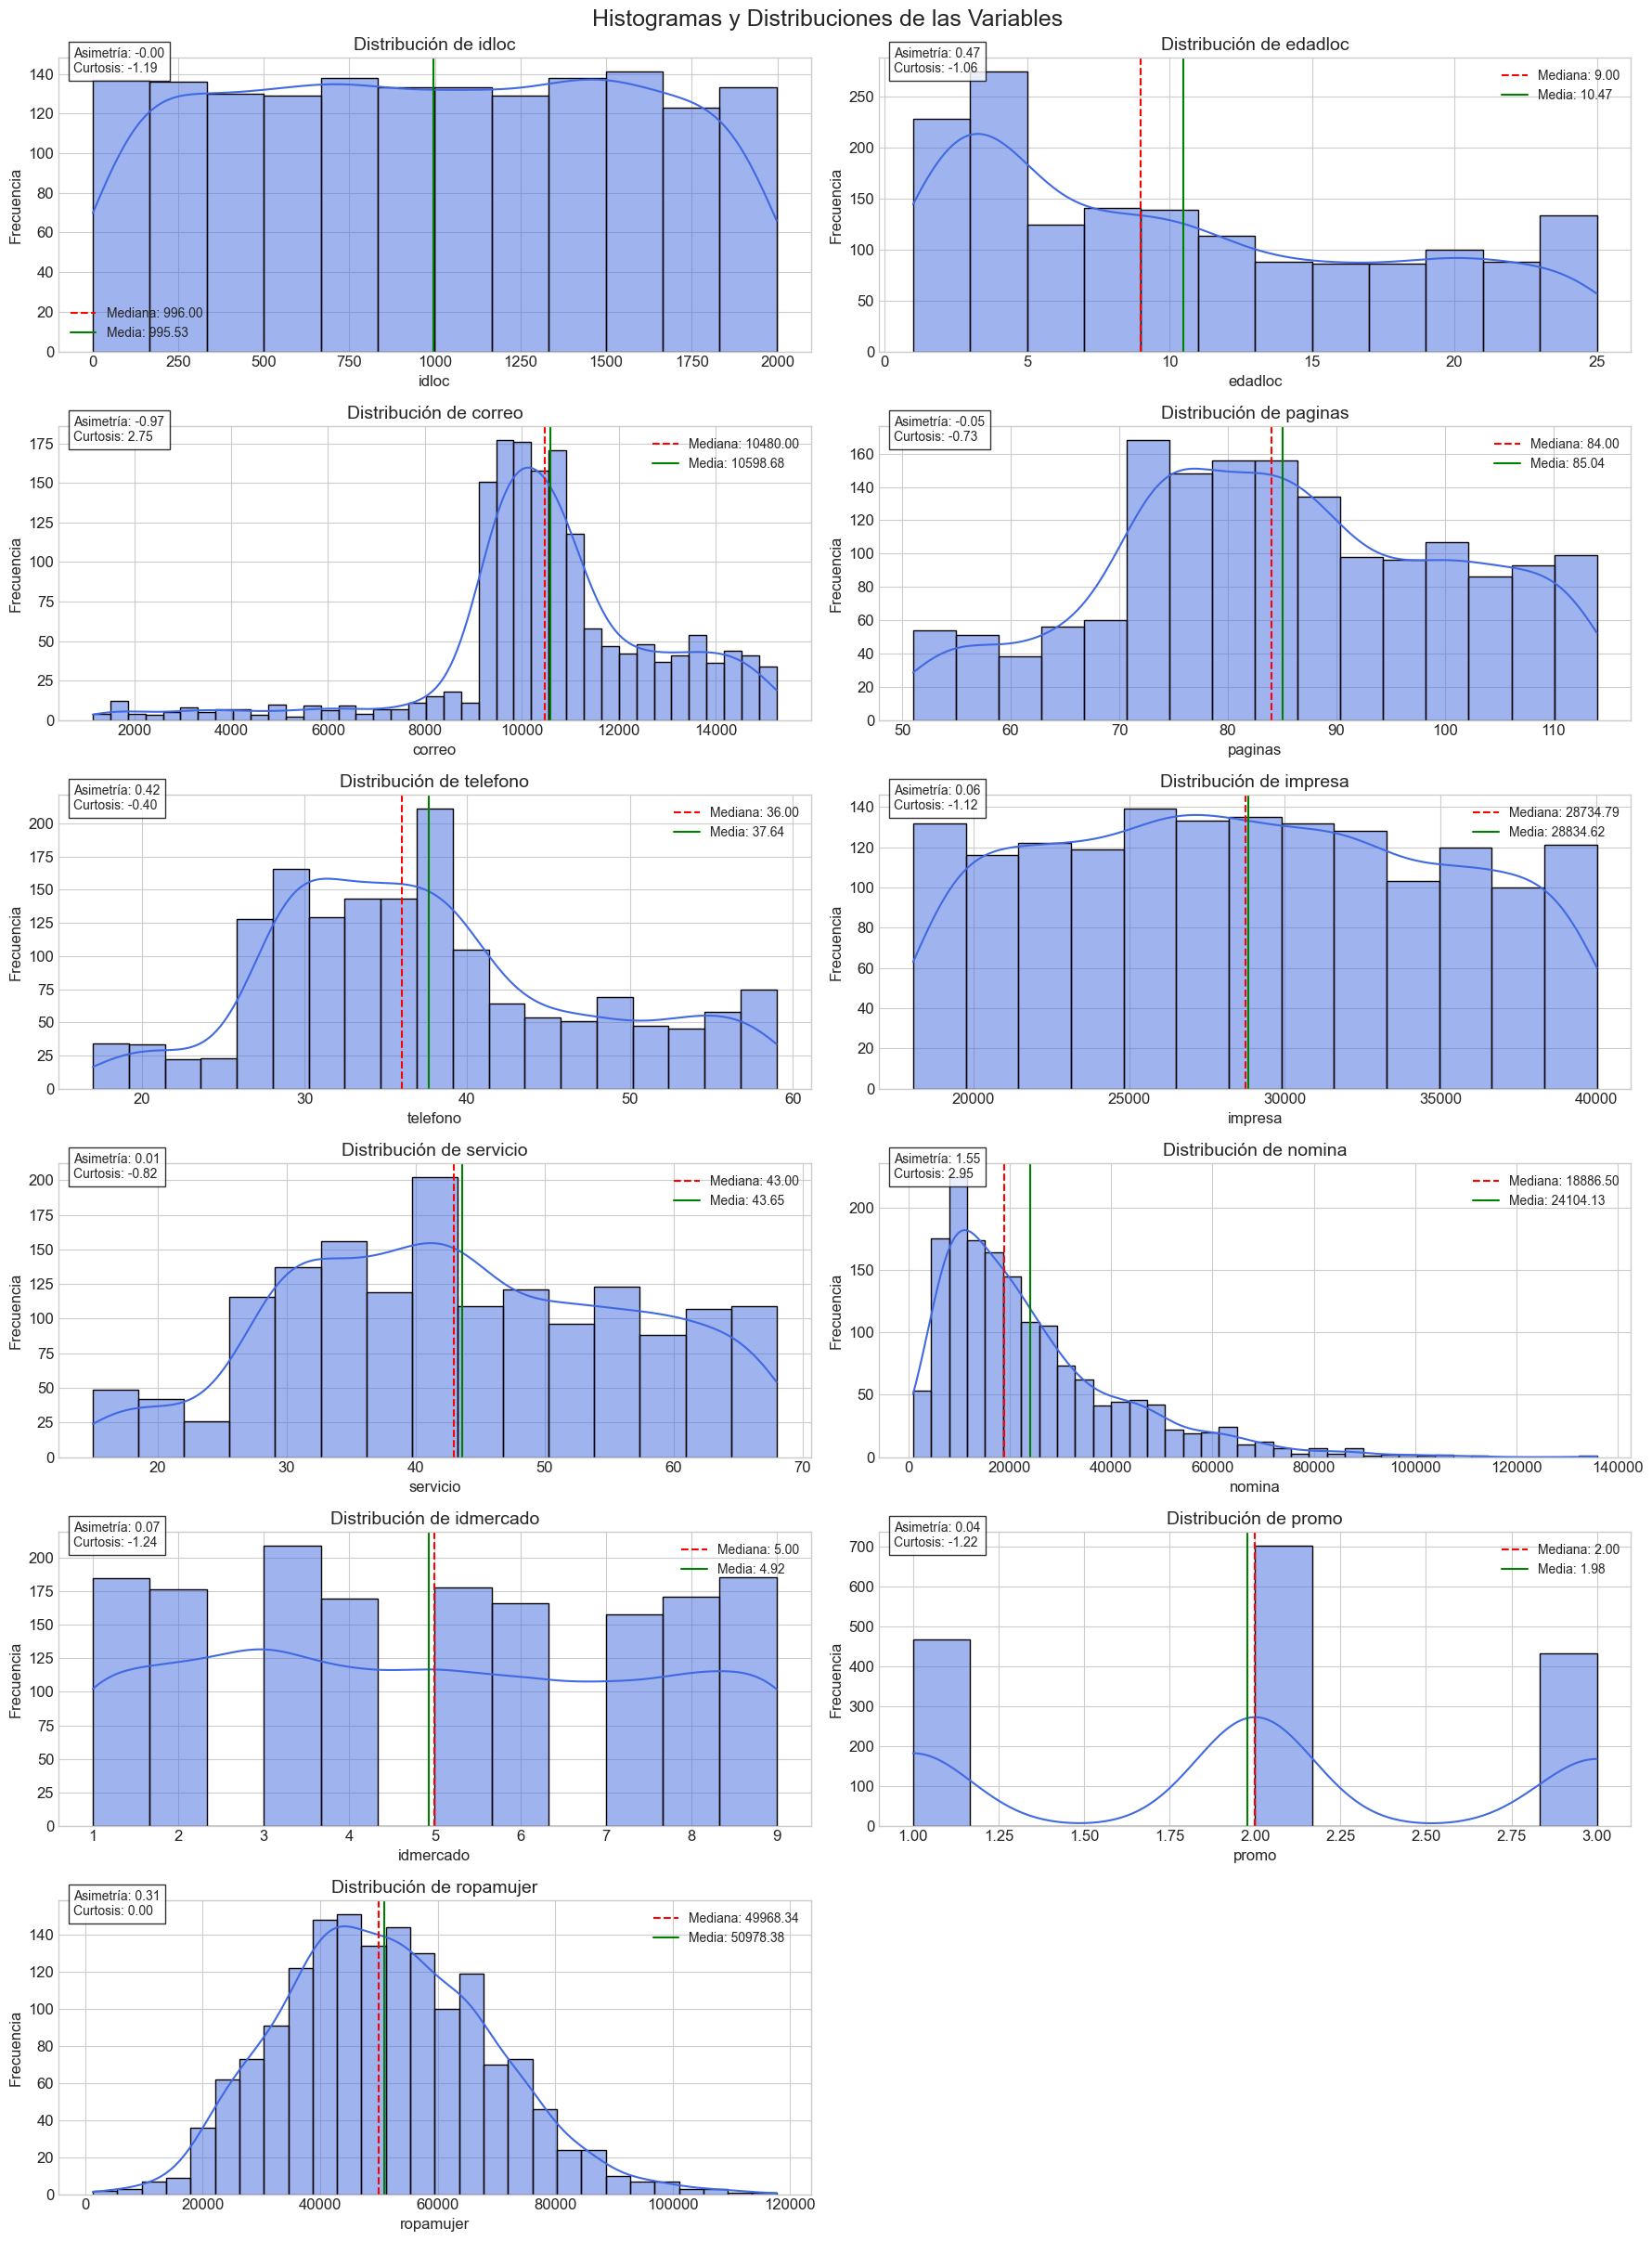

In [19]:
plot_distributions(df_ventas).show()

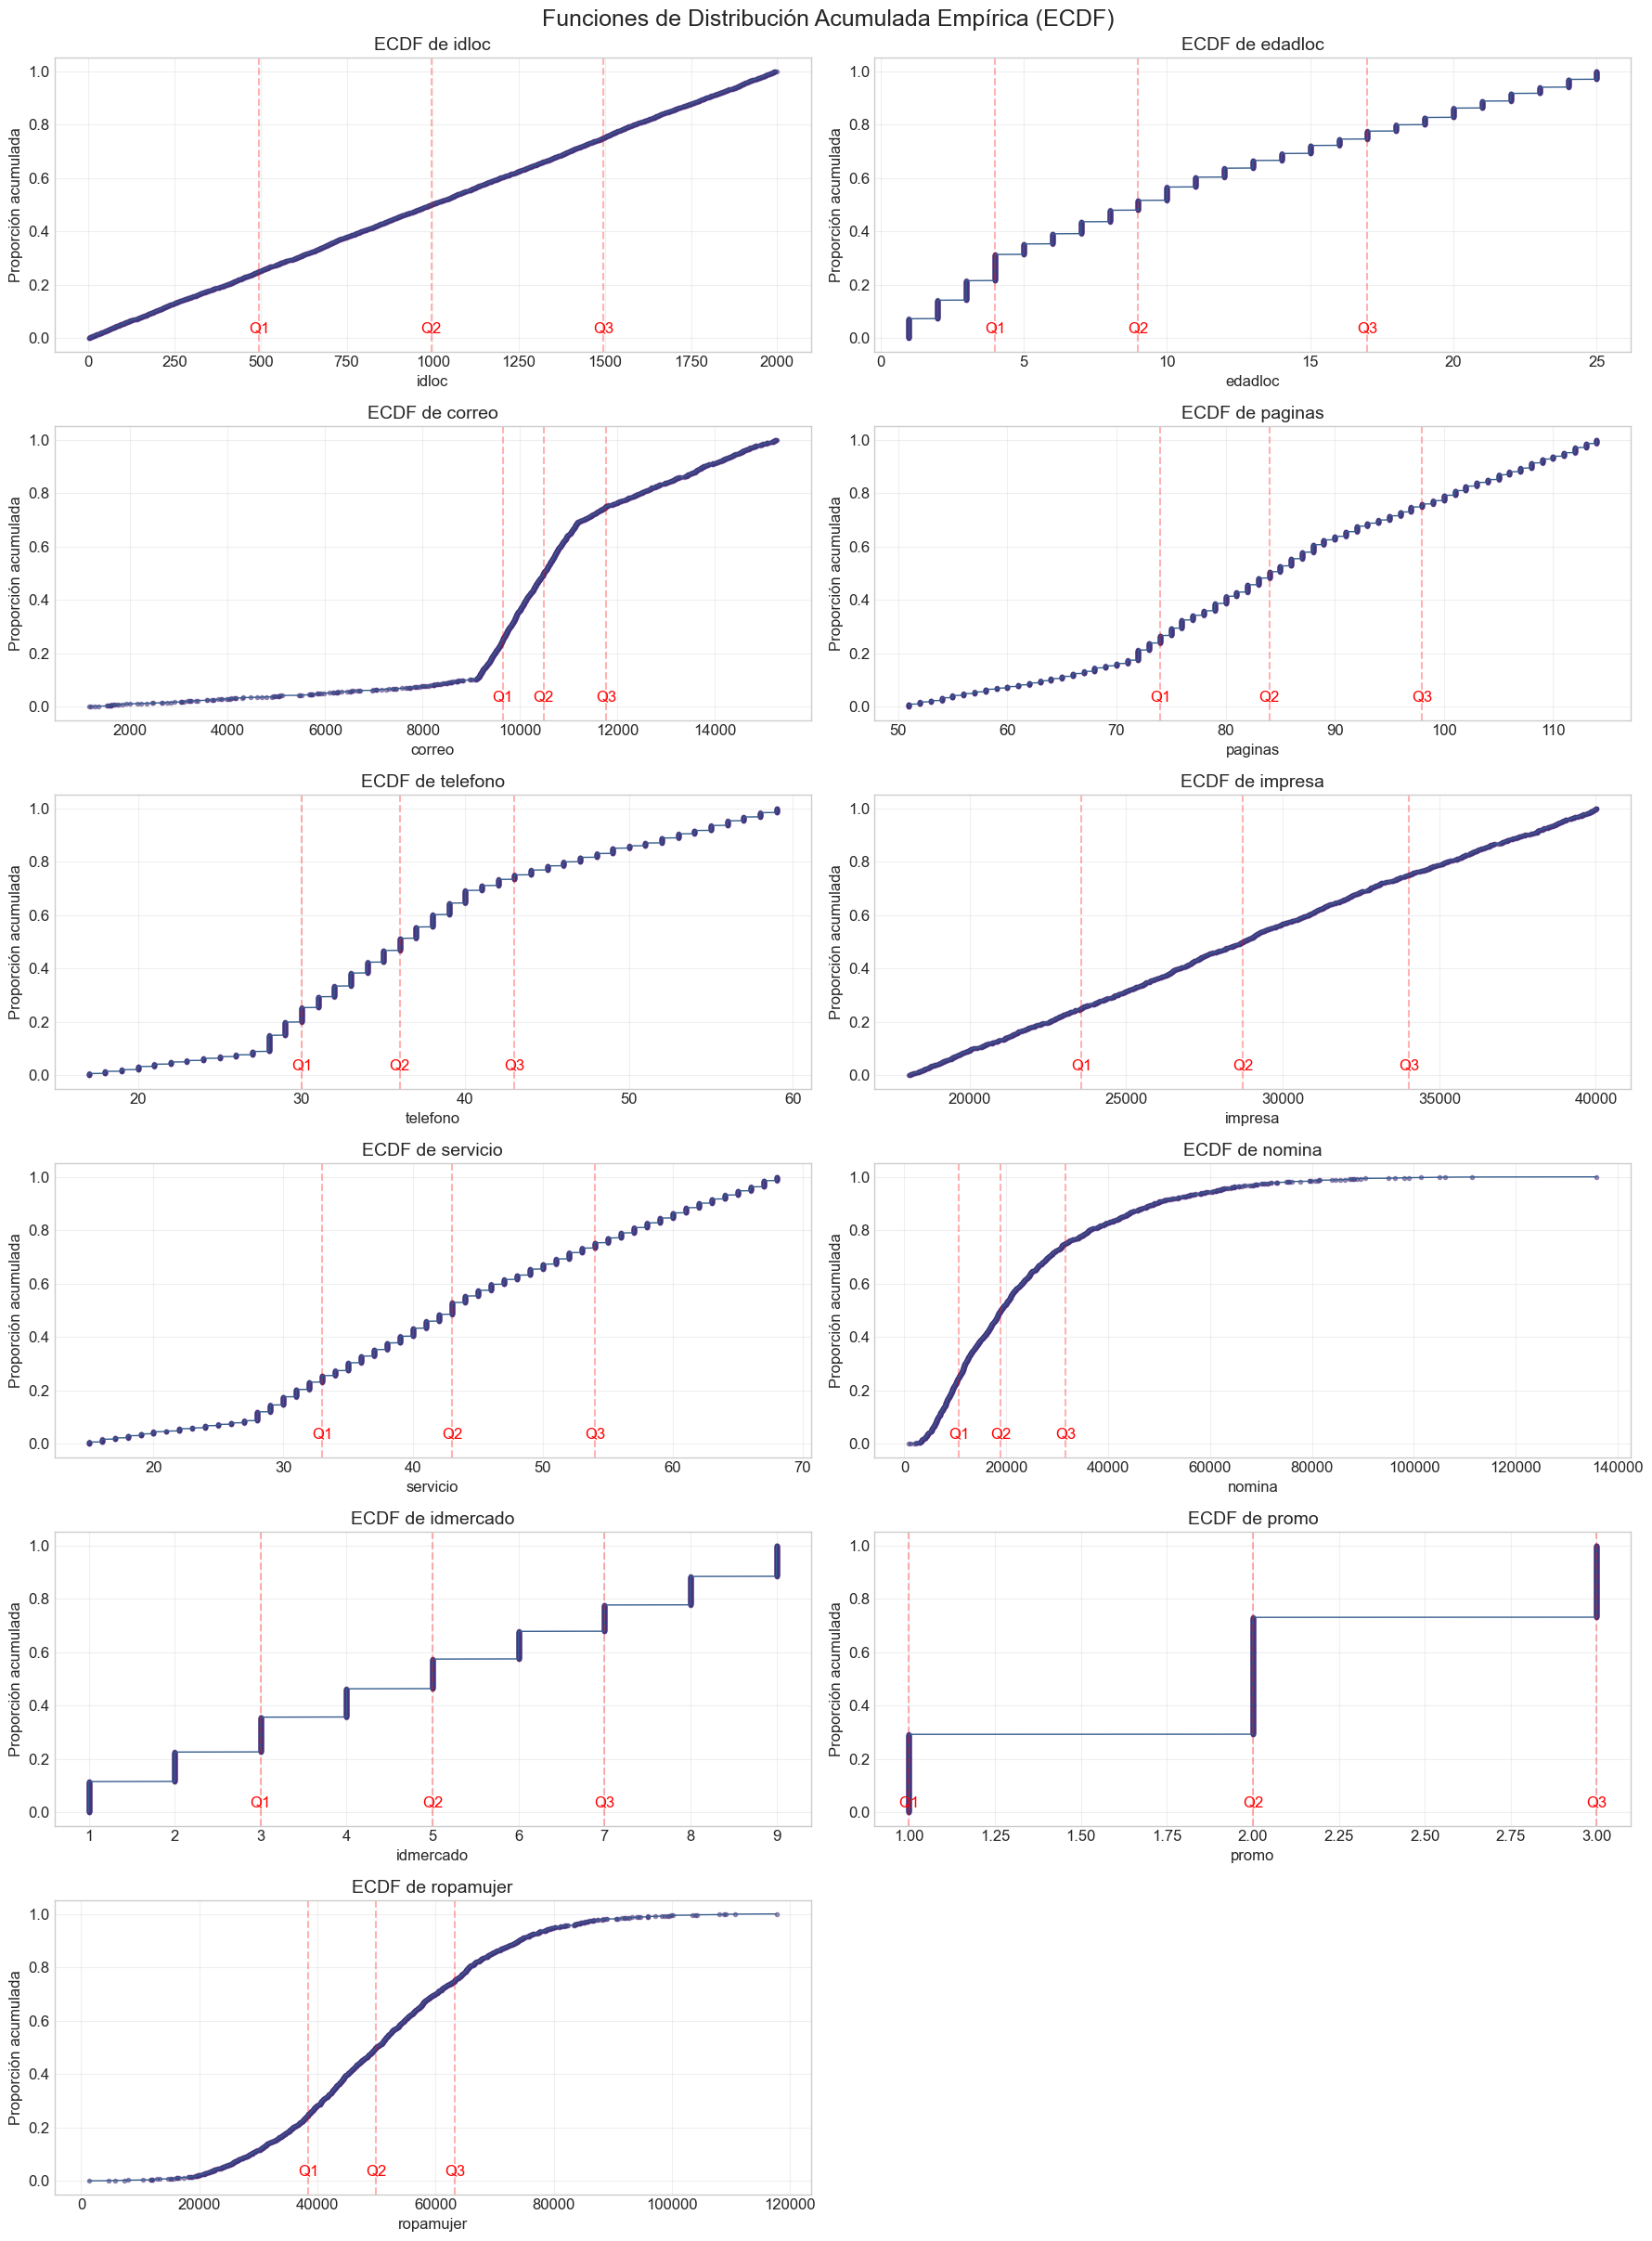

In [20]:
plot_ecdfs(df_ventas).show()

## Análisis Boxplot y Outliers

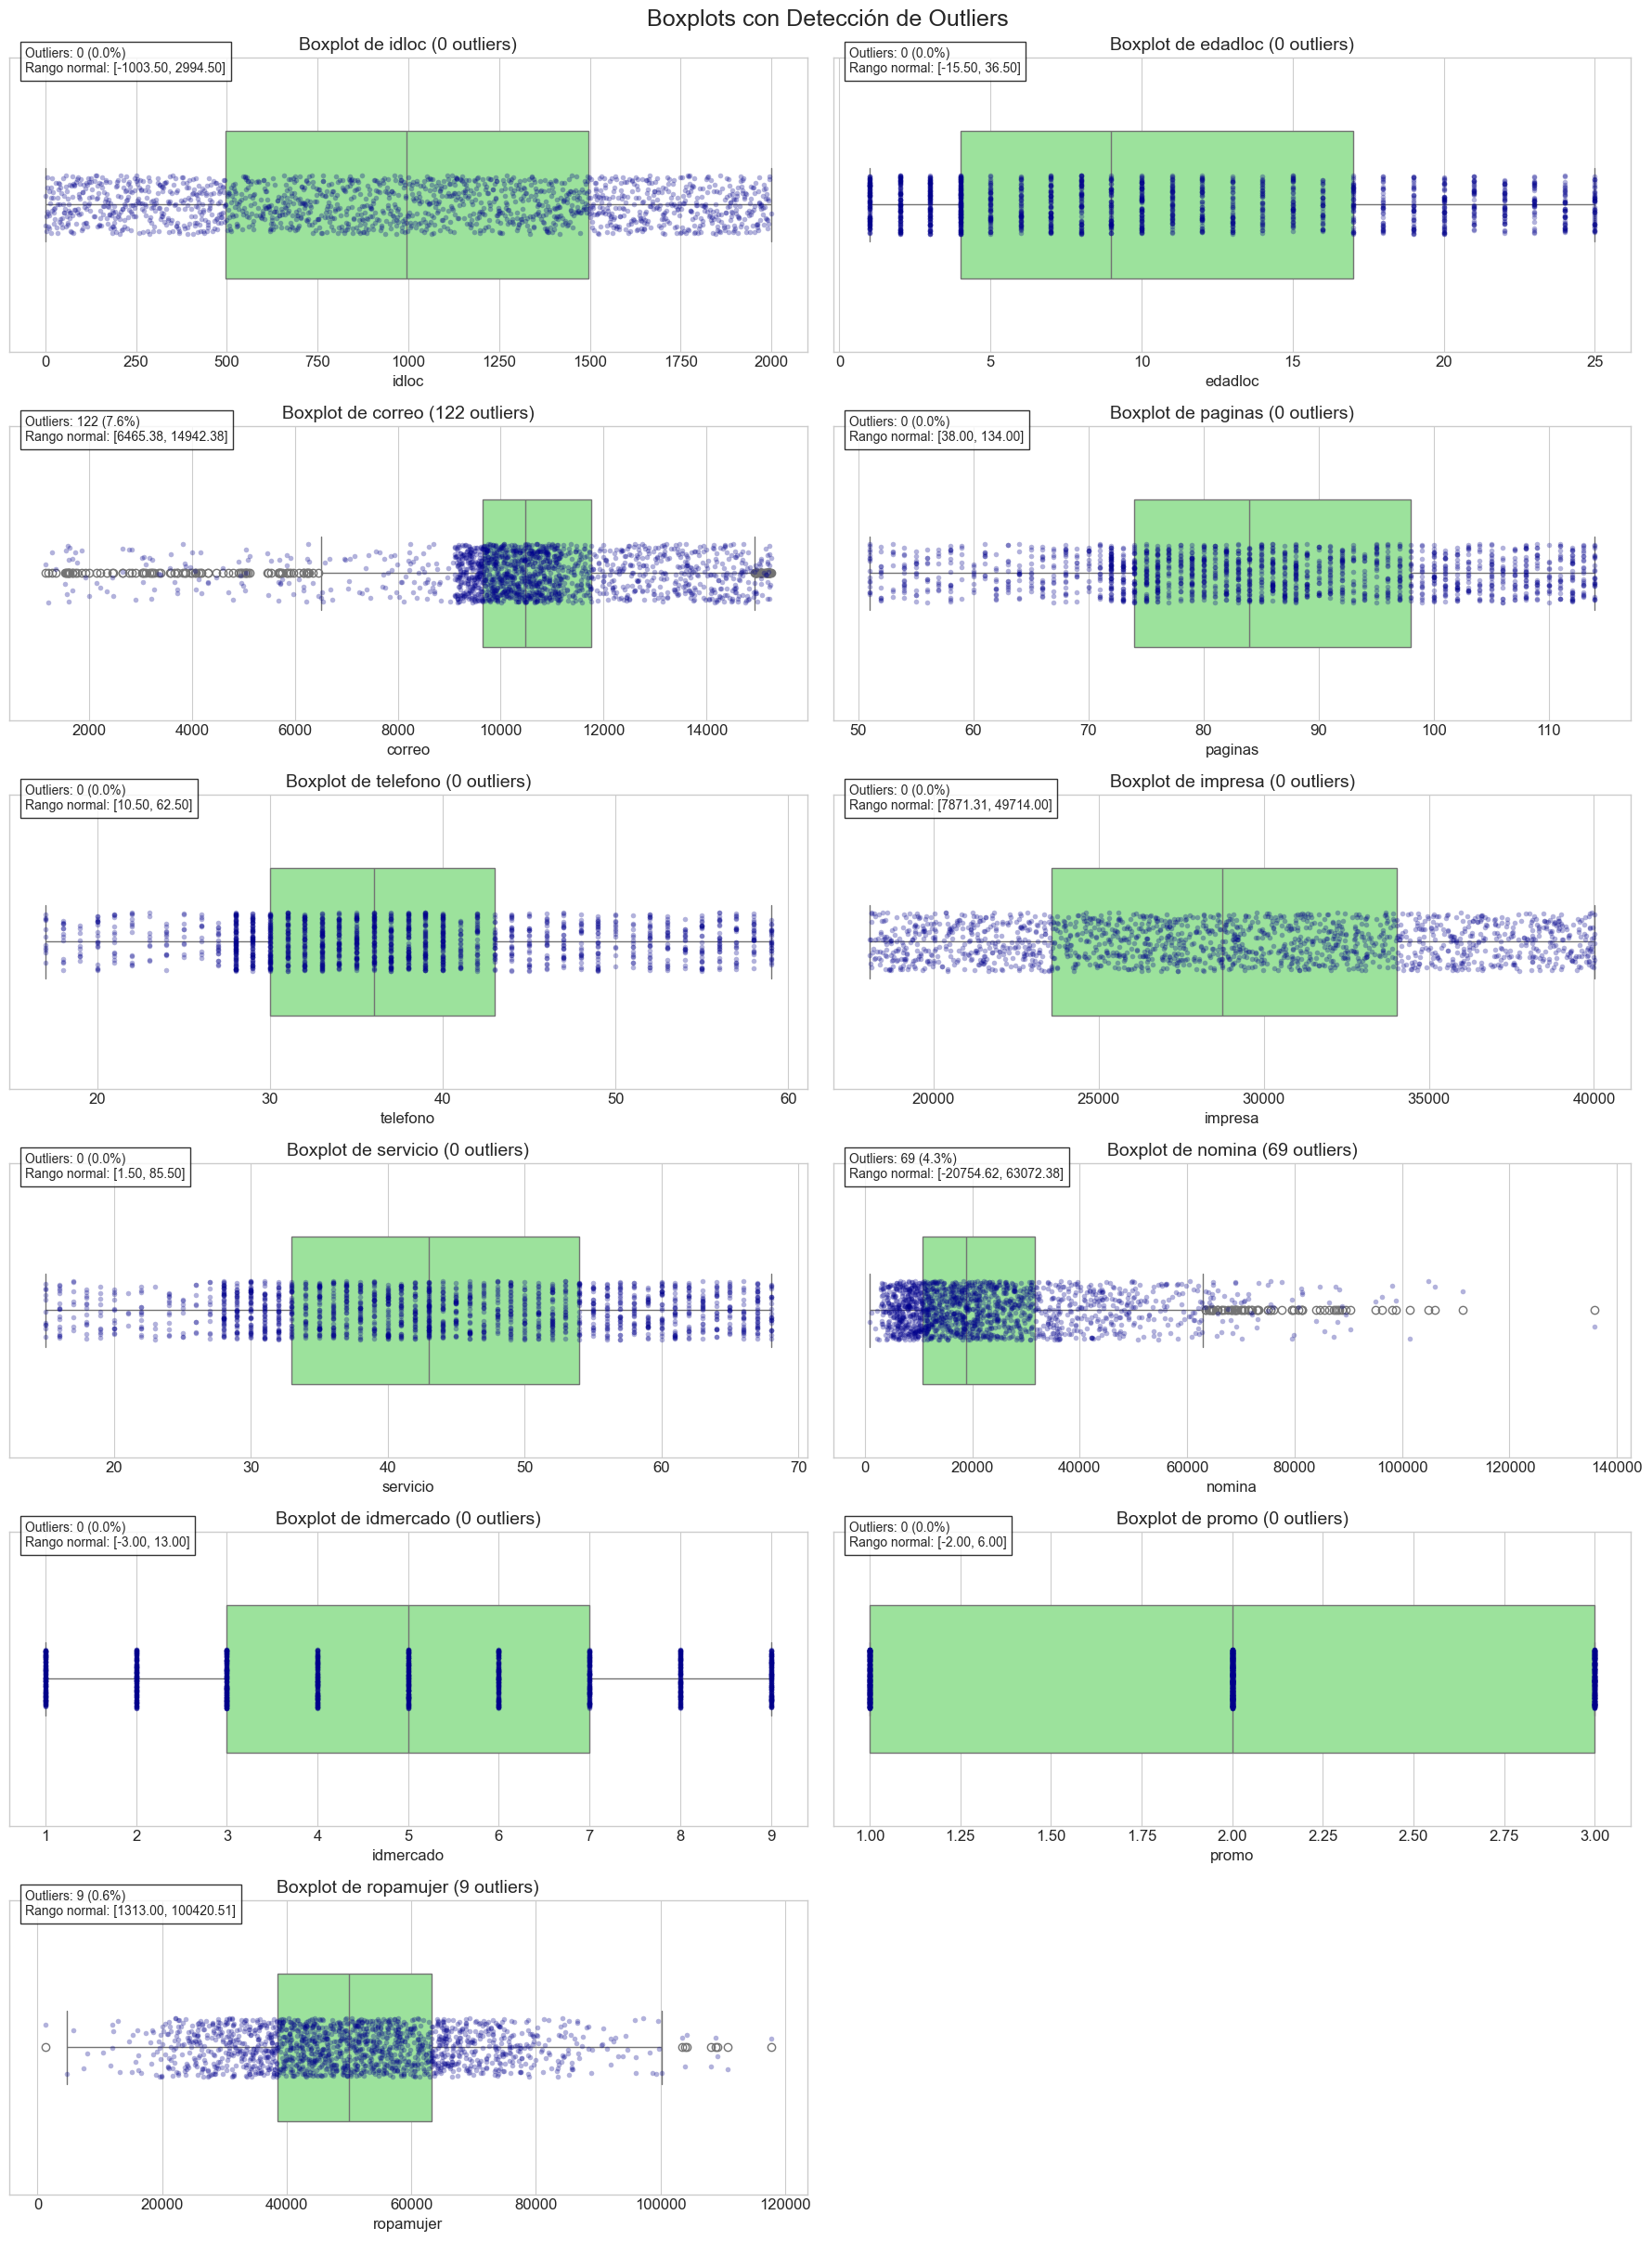

In [21]:
plot_boxplots(df_ventas).show()

## Correlación entre variables numéricas

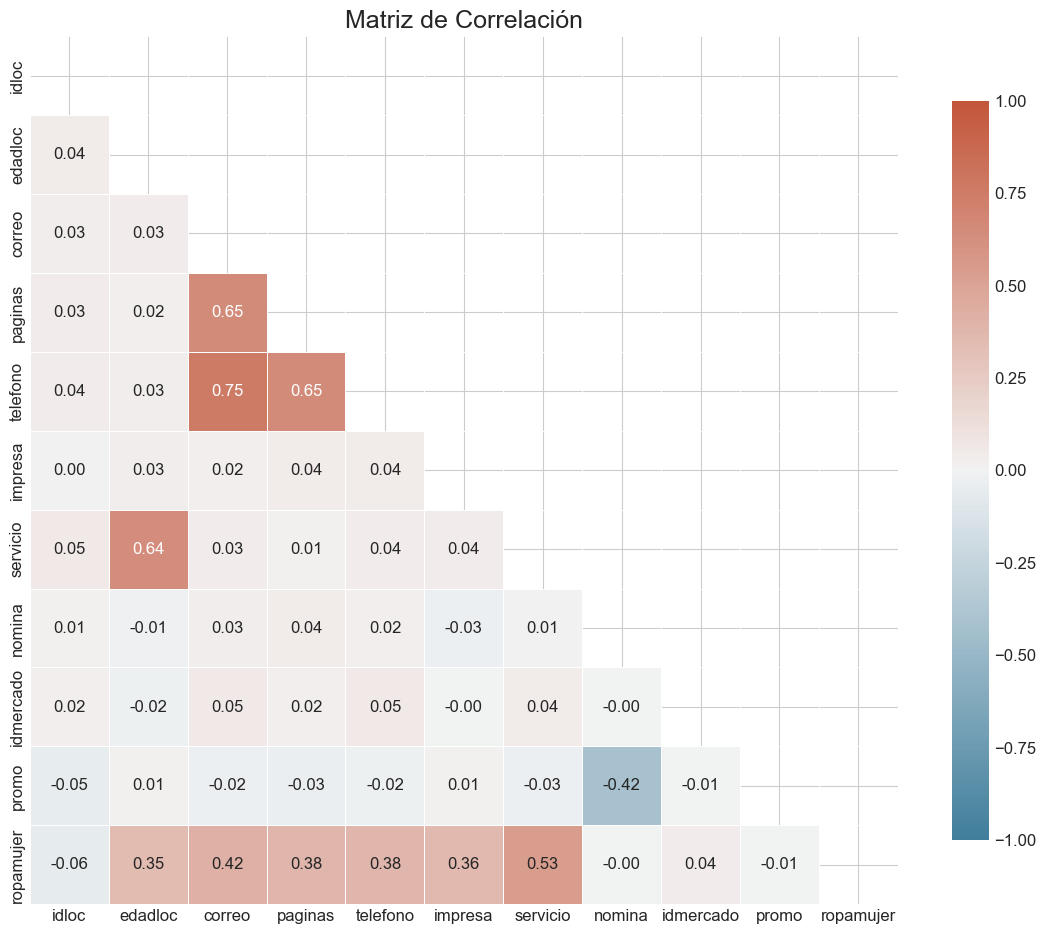

In [22]:
plot_correlation_matrix(df_ventas).show()

## Analisis variable Tamaño potencial del mercado

In [ ]:
# conteo de la variable tamamer del dataset
df_ventas['tamamer'].value_counts()

tamamer
Median     569
Grande     539
Pequeño    492
Name: count, dtype: int64

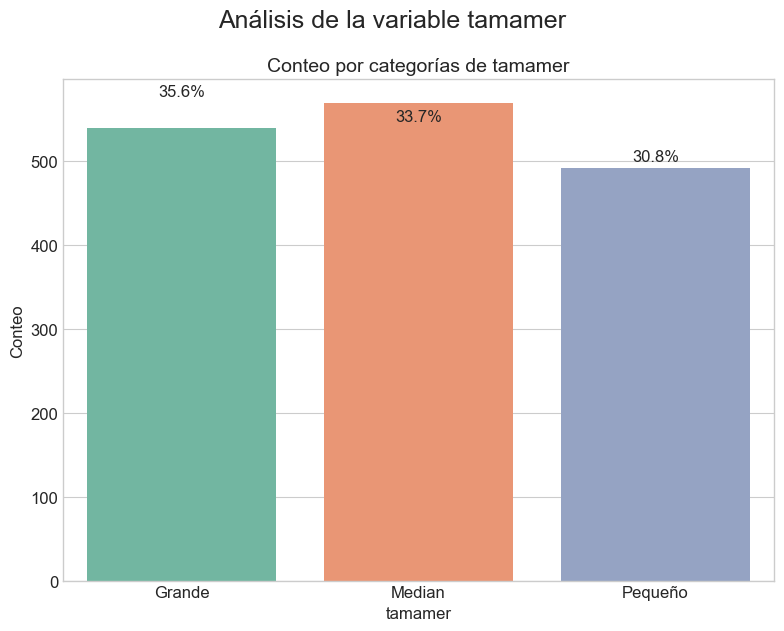

In [23]:
plot_categorical_analysis(df_ventas, 'tamamer').show()

# Preprocesamiento de datos

In [26]:
# Separamos los datos de train
df_train = df_ventas.copy()

In [27]:
# Separamos variables independientes (X) y dependiente (y)
X = df_train.drop('ropamujer', axis=1)
y = df_train['ropamujer']

In [28]:
# Convertimos variables categóricas a dummies
# Identificamos las columnas categóricas
cat_columns = X.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {cat_columns}")

Variables categóricas: ['tamamer']


In [29]:
# Aplicamos get_dummies con drop_first=True
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)
print("Dimensiones de X después de aplicar get_dummies:", X.shape)

Dimensiones de X después de aplicar get_dummies: (1600, 12)


In [31]:
# Normalizamos las variables numéricas
scaler = StandardScaler()
num_columns = X.select_dtypes(include=[np.number]).columns
X[num_columns] = scaler.fit_transform(X[num_columns])

# Construcción y evaluación de modelos

## División de datos para validación

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño de conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño de conjunto de validación: {X_val.shape}")

Tamaño de conjunto de entrenamiento: (1280, 12)
Tamaño de conjunto de validación: (320, 12)


## Regresión Lineal Simple

In [41]:
print("\n*** Modelo de Regresión Lineal ***")
lr = LinearRegression()
rmse_lr, r2_lr = evaluar_modelo_RL(lr, X, y)

# Ajustamos el modelo con todos los datos
lr.fit(X, y)


*** Modelo de Regresión Lineal ***
RMSE (validación cruzada): 11362.5162 ± 347.4100
R2 (validación cruzada): 0.5791 ± 0.0279


LinearRegression()

## Regresión Ridge con optimización de hiperparámetros

In [43]:
print("\n*** Modelo de Regresión Ridge ***")
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)}
ridge_grid = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X, y)


*** Modelo de Regresión Ridge ***


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='neg_mean_squared_error')

In [44]:
mejor_alpha_ridge = ridge_grid.best_params_['alpha']
print(f"Mejor alpha para Ridge: {mejor_alpha_ridge}")

Mejor alpha para Ridge: 10.0


In [45]:
ridge = Ridge(alpha=mejor_alpha_ridge)
rmse_ridge, r2_ridge = evaluar_modelo_RL(ridge, X, y)

# Ajustamos el modelo con todos los datos
ridge.fit(X, y)

RMSE (validación cruzada): 11360.6316 ± 347.4018
R2 (validación cruzada): 0.5793 ± 0.0277


Ridge(alpha=np.float64(10.0))

## Regresión Lasso con optimización de hiperparámetros

In [ ]:
print("\n*** Modelo de Regresión Lasso ***")
param_grid_lasso = {'alpha': np.logspace(-3, 3, 7)}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X, y)


*** Modelo de Regresión Lasso ***


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='neg_mean_squared_error')

In [47]:
mejor_alpha_lasso = lasso_grid.best_params_['alpha']
print(f"Mejor alpha para Lasso: {mejor_alpha_lasso}")

Mejor alpha para Lasso: 100.0


In [49]:
lasso = Lasso(alpha=mejor_alpha_lasso, max_iter=10000)
rmse_lasso, r2_lasso = evaluar_modelo_RL(lasso, X, y)

# Ajustamos el modelo con todos los datos
lasso.fit(X, y)

RMSE (validación cruzada): 11333.3543 ± 356.3659
R2 (validación cruzada): 0.5814 ± 0.0268


Lasso(alpha=np.float64(100.0), max_iter=10000)

In [50]:
# Análisis de coeficientes de Lasso para ver qué variables son seleccionadas
coef_lasso = pd.DataFrame({'Variable': X.columns, 'Coeficiente': lasso.coef_})
coef_lasso = coef_lasso.sort_values('Coeficiente', key=abs, ascending=False)
print("\nVariables más importantes según Lasso:")
print(coef_lasso.head(10))


Variables más importantes según Lasso:
    Variable  Coeficiente
6   servicio  8961.839768
5    impresa  5755.573756
2     correo  4430.818210
3    paginas  2841.818897
0      idloc -1647.948733
4   telefono   795.250803
7     nomina   -67.912919
9      promo    36.504242
1    edadloc     7.819570
8  idmercado     0.000000


## Regresión ElasticNet con optimización de hiperparámetros

In [51]:
print("\n*** Modelo de Regresión ElasticNet ***")
param_grid_elasticnet = {
    'alpha': np.logspace(-3, 3, 7),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}


*** Modelo de Regresión ElasticNet ***


In [52]:
elasticnet_grid = GridSearchCV(ElasticNet(max_iter=10000), param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X, y)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error')

In [53]:
mejor_params_elasticnet = elasticnet_grid.best_params_
print(f"Mejores parámetros para ElasticNet: {mejor_params_elasticnet}")

Mejores parámetros para ElasticNet: {'alpha': np.float64(0.1), 'l1_ratio': 0.9}


In [54]:
elasticnet = ElasticNet(alpha=mejor_params_elasticnet['alpha'], 
                        l1_ratio=mejor_params_elasticnet['l1_ratio'], 
                        max_iter=10000)
rmse_elasticnet, r2_elasticnet = evaluar_modelo_RL(elasticnet, X, y)

# Ajustamos el modelo con todos los datos
elasticnet.fit(X, y)

RMSE (validación cruzada): 11360.3319 ± 347.3820
R2 (validación cruzada): 0.5793 ± 0.0276


ElasticNet(alpha=np.float64(0.1), l1_ratio=0.9, max_iter=10000)

# Comparación de modelos

In [55]:
modelos = {
    'Regresión Lineal': (lr, rmse_lr, r2_lr),
    'Ridge': (ridge, rmse_ridge, r2_ridge),
    'Lasso': (lasso, rmse_lasso, r2_lasso),
    'ElasticNet': (elasticnet, rmse_elasticnet, r2_elasticnet)
}

In [56]:
# Seleccionamos el mejor modelo basado en RMSE
mejor_modelo_nombre = min(modelos.items(), key=lambda x: x[1][1])[0]
mejor_modelo, mejor_rmse, mejor_r2 = modelos[mejor_modelo_nombre]

print(f"\nEl mejor modelo es: {mejor_modelo_nombre} con RMSE: {mejor_rmse:.4f} y R2: {mejor_r2:.4f}")


El mejor modelo es: Lasso con RMSE: 11333.3543 y R2: 0.5814


# Predicción en conjunto de prueba

In [62]:
df_test = pd.read_excel("Data/Datos_Taller.xlsx", sheet_name="Test")
df_test.head()

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo,ropamujer
0,22,3,9115,65,30,26496.36,27,21936,2,Grande,3,NaN
1,14,18,8438,82,35,20911.52,22,25542,1,Grande,2,NaN
2,91,5,11890,92,50,24474.30,53,18591,9,Grande,1,NaN
3,32,20,9003,54,27,33446.10,26,23028,2,Grande,3,NaN
4,28,8,9152,91,24,27234.64,22,20214,2,Grande,3,NaN


In [63]:
X_test = df_test.drop('ropamujer', axis=1)
X_test

,idloc,edadloc,correo,paginas,telefono,impresa,servicio,nomina,idmercado,tamamer,promo
0,22,3,9115,65,30,26496.36,27,21936,2,Grande,3
1,14,18,8438,82,35,20911.52,22,25542,1,Grande,2
2,91,5,11890,92,50,24474.30,53,18591,9,Grande,1
3,32,20,9003,54,27,33446.10,26,23028,2,Grande,3
4,28,8,9152,91,24,27234.64,22,20214,2,Grande,3
...,...,...,...,...,...,...,...,...,...,...,...
395,1993,21,9543,81,31,26822.03,56,96575,1,Grande,2
396,1996,22,10229,79,30,24233.06,62,6904,6,Pequeño,3
397,1997,8,9822,54,36,19195.68,40,9563,3,Pequeño,3
398,1999,18,10701,79,37,33057.30,47,27438,9,Median,2


In [64]:
# Aplicamos get_dummies con las mismas categorías que en entrenamiento
X_test = pd.get_dummies(df_test, columns=cat_columns, drop_first=True)

In [65]:
# Aseguramos que X_test tenga las mismas columnas que X
missing_cols = set(X.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

In [66]:
# Aseguramos el mismo orden de columnas
X_test = X_test[X.columns]

In [67]:
# Aplicamos la misma normalización
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [68]:
# Hacemos la predicción con el mejor modelo
y_pred = mejor_modelo.predict(X_test)

In [72]:
# Crear DataFrame de resultados
df_resultados = pd.DataFrame({
    'idloc': df_test['idloc'],
    'ropamujer': y_pred
})

In [73]:
print("\nPredicciones para el conjunto de prueba:")
df_resultados.head()


Predicciones para el conjunto de prueba:


,idloc,ropamujer
0,22,33442.549965
1,14,27081.217213
2,91,60474.994797
3,32,36737.752959
4,28,34948.741133


In [74]:
# Guardar resultados
df_resultados.to_csv('Data/predicciones_ventas.csv', index=False)
print("\nPredicciones guardadas en 'predicciones_ventas.csv'")


Predicciones guardadas en 'predicciones_ventas.csv'


# Análisis de importancia de variables

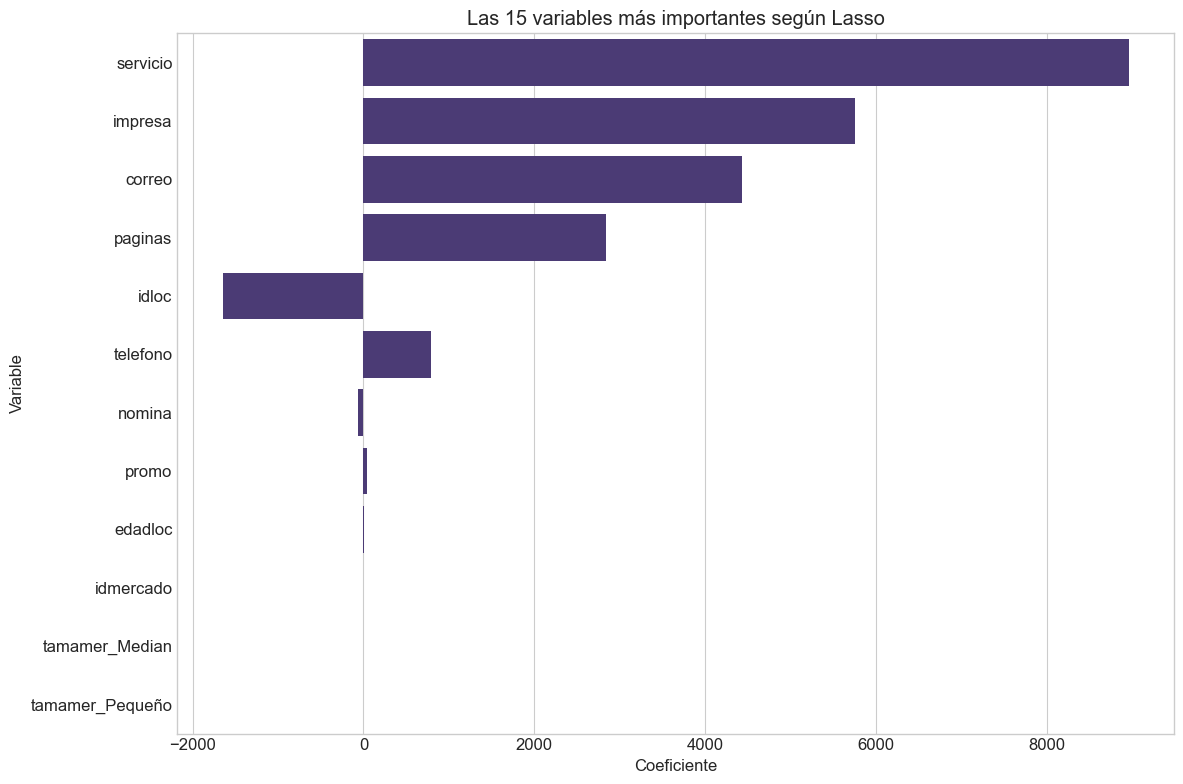

In [75]:
if mejor_modelo_nombre == 'Regresión Lineal':
    coefs = pd.DataFrame({'Variable': X.columns, 'Coeficiente': mejor_modelo.coef_})
elif mejor_modelo_nombre in ['Ridge', 'Lasso', 'ElasticNet']:
    coefs = pd.DataFrame({'Variable': X.columns, 'Coeficiente': mejor_modelo.coef_})

coefs = coefs.sort_values('Coeficiente', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variable', data=coefs.head(15))
plt.title(f'Las 15 variables más importantes según {mejor_modelo_nombre}')
plt.tight_layout()
plt.show()

# 10. Conclusiones

In [76]:
print("\n*** Conclusiones ***")
print(f"1. El mejor modelo para predecir las ventas de ropa mujer es {mejor_modelo_nombre}.")
print(f"2. El RMSE obtenido en validación cruzada es {mejor_rmse:.4f}, lo que indica un error promedio de {mejor_rmse:.4f} millones de pesos.")
print(f"3. El R² de {mejor_r2:.4f} indica que el modelo explica aproximadamente el {mejor_r2*100:.1f}% de la variabilidad en las ventas.")
print("4. Las variables más importantes para predecir las ventas son:")

for i, row in coefs.head(5).iterrows():
    print(f"   - {row['Variable']}: {row['Coeficiente']:.4f}")

print("5. El análisis sugiere que los recursos asignados sí tienen poder para modelar la demanda en las respectivas zonas.")


*** Conclusiones ***
1. El mejor modelo para predecir las ventas de ropa mujer es Lasso.
2. El RMSE obtenido en validación cruzada es 11333.3543, lo que indica un error promedio de 11333.3543 millones de pesos.
3. El R² de 0.5814 indica que el modelo explica aproximadamente el 58.1% de la variabilidad en las ventas.
4. Las variables más importantes para predecir las ventas son:
   - servicio: 8961.8398
   - impresa: 5755.5738
   - correo: 4430.8182
   - paginas: 2841.8189
   - idloc: -1647.9487
5. El análisis sugiere que los recursos asignados sí tienen poder para modelar la demanda en las respectivas zonas.
